In [1]:
# Gym stuff
import gym
import gym_anytrading

# Stable baselines - rl stuff
from stable_baselines.common.vec_env import DummyVecEnv
from stable_baselines import A2C

# Processing libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

d:\Users\Mitch\Google Drive\GitHub\rl_trading\.venv\lib\site-packages\ale_py\roms\utils.py:90: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for external in metadata.entry_points().get(self.group, []):


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



d:\Users\Mitch\Google Drive\GitHub\rl_trading\.venv\lib\site-packages\stable_baselines\__init__.py:33: UserWarning: stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation.
  "stable-baselines is in maintenance mode, please use [Stable-Baselines3 (SB3)](https://github.com/DLR-RM/stable-baselines3) for an up-to-date version. You can find a [migration guide](https://stable-baselines3.readthedocs.io/en/master/guide/migration.html) in SB3 documentation."


# 1. Bring in Marketwatch GME Data 
https://www.marketwatch.com/investing/stock/gme/download-data?startDate=11/1/2019&endDate=03/12/2021

In [2]:
df = pd.read_csv('data/gme.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,03/12/2021,275.00,295.50,262.27,264.5,"25,845,900"
1,03/11/2021,241.64,281.50,232.60,260.0,"28,312,490"
2,03/10/2021,269.43,348.50,172.00,265.0,"71,570,570"
3,03/09/2021,217.71,249.85,208.51,246.9,"39,099,328"
4,03/08/2021,154.89,210.87,146.10,194.5,"63,565,621"


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [5]:
df.sort_values('Date', ascending=True, inplace=True)
df.head()

,Date,Open,High,Low,Close,Volume
250,2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
249,2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
248,2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
247,2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
246,2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [6]:
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-03-16,3.93,4.57,3.90,4.37,"4,866,696"
2020-03-17,4.40,4.65,4.11,4.23,"3,562,210"
2020-03-18,4.10,4.25,3.50,3.77,"3,651,709"
2020-03-19,3.71,4.20,3.55,4.19,"5,039,539"
2020-03-20,4.08,4.08,3.65,3.76,"7,722,194"


In [7]:
env = gym.make('stocks-v0', df=df, frame_bound=(5,250), window_size=5)

In [8]:
env.signal_features

array([[ 4.3700e+00,  0.0000e+00],
       [ 4.2300e+00, -1.4000e-01],
       [ 3.7700e+00, -4.6000e-01],
       [ 4.1900e+00,  4.2000e-01],
       [ 3.7600e+00, -4.3000e-01],
       [ 3.8100e+00,  5.0000e-02],
       [ 4.1600e+00,  3.5000e-01],
       [ 4.1700e+00,  1.0000e-02],
       [ 4.4100e+00,  2.4000e-01],
       [ 4.2200e+00, -1.9000e-01],
       [ 3.6500e+00, -5.7000e-01],
       [ 3.5000e+00, -1.5000e-01],
       [ 3.2500e+00, -2.5000e-01],
       [ 2.8500e+00, -4.0000e-01],
       [ 2.8000e+00, -5.0000e-02],
       [ 3.0900e+00,  2.9000e-01],
       [ 3.2700e+00,  1.8000e-01],
       [ 3.4100e+00,  1.4000e-01],
       [ 3.8900e+00,  4.8000e-01],
       [ 4.7400e+00,  8.5000e-01],
       [ 5.9500e+00,  1.2100e+00],
       [ 5.2700e+00, -6.8000e-01],
       [ 5.0300e+00, -2.4000e-01],
       [ 4.8800e+00, -1.5000e-01],
       [ 5.6100e+00,  7.3000e-01],
       [ 4.7800e+00, -8.3000e-01],
       [ 4.8900e+00,  1.1000e-01],
       [ 4.7000e+00, -1.9000e-01],
       [ 4.7700e+00,

# 2. Build Environment

In [9]:
env.action_space

Discrete(2)

info {'total_reward': 227.38, 'total_profit': 10.815861642742568, 'position': 1}


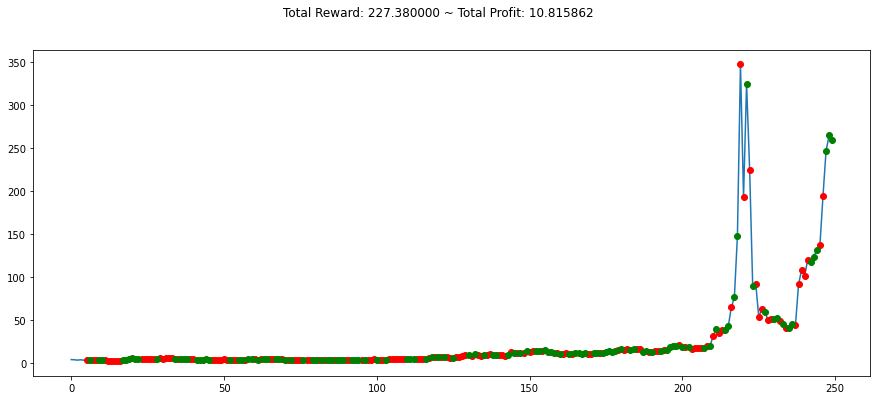

In [10]:
state = env.reset()
while True: 
    action = env.action_space.sample()
    n_state, reward, done, info = env.step(action)
    if done: 
        print("info", info)
        break
        
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

# 2.1 Add Custom Indicators

## 2.1.1. Install and Import New Dependencies

In [11]:
from gym_anytrading.envs import StocksEnv
from finta import TA

## 2.1.2. Fix Volume Column

In [12]:
df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",", "")))

In [13]:
df.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object

## 2.1.3. Calculate SMA, RSI and OBV

In [14]:
df['SMA'] = TA.SMA(df, 12)
df['RSI'] = TA.RSI(df)
df['OBV'] = TA.OBV(df)
df.fillna(0, inplace=True)

In [15]:
df.head(15)

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.000000,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.000000,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.000000,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.000000,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.000000,29.351457,-9896574.0
2020-03-23,3.58,3.86,3.50,3.81,6009784.0,0.000000,32.102964,-3886790.0
2020-03-24,3.95,4.21,3.89,4.16,6805659.0,0.000000,47.512950,2918869.0
2020-03-25,4.15,4.49,4.04,4.17,3592059.0,0.000000,47.876947,6510928.0
2020-03-26,4.24,4.71,4.24,4.41,6210979.0,0.000000,55.799557,12721907.0


## 2.1.4. Create New Environments

In [16]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Low', 'Volume','SMA', 'RSI', 'OBV']].to_numpy()[start:end]
    return prices, signal_features

In [17]:
class MyCustomEnv(StocksEnv):
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df, window_size=12, frame_bound=(12,50))

In [18]:
env2.signal_features

array([[ 3.90000000e+00,  4.86669600e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 4.11000000e+00,  3.56221000e+06,  0.00000000e+00,
         0.00000000e+00, -3.56221000e+06],
       [ 3.50000000e+00,  3.65170900e+06,  0.00000000e+00,
         0.00000000e+00, -7.21391900e+06],
       [ 3.55000000e+00,  5.03953900e+06,  0.00000000e+00,
         4.33948339e+01, -2.17438000e+06],
       [ 3.65000000e+00,  7.72219400e+06,  0.00000000e+00,
         2.93514572e+01, -9.89657400e+06],
       [ 3.50000000e+00,  6.00978400e+06,  0.00000000e+00,
         3.21029638e+01, -3.88679000e+06],
       [ 3.89000000e+00,  6.80565900e+06,  0.00000000e+00,
         4.75129499e+01,  2.91886900e+06],
       [ 4.04000000e+00,  3.59205900e+06,  0.00000000e+00,
         4.78769470e+01,  6.51092800e+06],
       [ 4.24000000e+00,  6.21097900e+06,  0.00000000e+00,
         5.57995572e+01,  1.27219070e+07],
       [ 4.15000000e+00,  7.02476300e+06,  0.00000000e+00,
         4.93981406e+01

In [19]:
df.head()

,Open,High,Low,Close,Volume,SMA,RSI,OBV
Date,,,,,,,,
2020-03-16,3.93,4.57,3.90,4.37,4866696.0,0.0,0.000000,0.0
2020-03-17,4.40,4.65,4.11,4.23,3562210.0,0.0,0.000000,-3562210.0
2020-03-18,4.10,4.25,3.50,3.77,3651709.0,0.0,0.000000,-7213919.0
2020-03-19,3.71,4.20,3.55,4.19,5039539.0,0.0,43.394834,-2174380.0
2020-03-20,4.08,4.08,3.65,3.76,7722194.0,0.0,29.351457,-9896574.0


# 3. Build Environment and Train

In [20]:
env_maker = lambda: env2
env = DummyVecEnv([env_maker])

In [21]:
model = A2C('MlpLstmPolicy', env, verbose=1) 
model.learn(total_timesteps=1000000)





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -430     |
| fps                | 27       |
| nupdates           | 1        |
| policy_entropy     | 0.693    |
| total_timesteps    | 5        |
| value_loss         | 0.000774 |
---------------------------------
---------------------------------
| explained_variance | -0.0616  |
| fps                | 641      |
| nupdates           | 100      |
| policy_entropy     | 0.693    |
| total_timesteps    | 500      |
| value_loss         | 0.0926   |
---------------------------------
---------------------------------
| explained_variance | -0.129   |
| fps                | 735     

# 4. Evaluation

In [22]:
env = MyCustomEnv(df=df, window_size=12, frame_bound=(80,250))
obs = env.reset()
while True: 
    obs = obs[np.newaxis, ...]
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 15.459999999999999, 'total_profit': 45.85418961975402, 'position': 1}


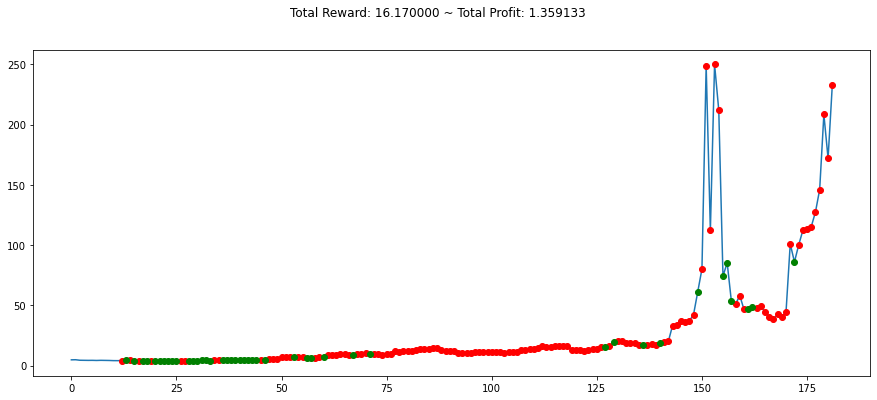

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()